In [2]:
import warnings
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
from matplotlib.lines import Line2D
from pandas.core.common import SettingWithCopyWarning


raw_data_dir = "D:/Desktop/ECL/Research_Project/"

In [3]:
with open(raw_data_dir + "traces.json",encoding="utf8") as f:
    d = json.load(f)
raw_logs = pd.json_normalize(d)
raw_logs.axes

[RangeIndex(start=0, stop=101924, step=1),
 Index(['result', '_id.$oid', 'timestamp.$date', 'stored.$date', 'actor.openid',
        'actor.objectType', 'verb.id', 'object.id', 'object.objectType',
        'object.extension',
        'context.extension.https://www.cristal.univ-lille.fr/objects/Session/ID',
        'context.extension.https://www.cristal.univ-lille.fr/objects/Plugin',
        'object.extension.https://www.cristal.univ-lille.fr/objects/Command/CommandRan',
        'object.extension.https://www.cristal.univ-lille.fr/objects/Program/CodeState',
        'result.success',
        'result.extension.https://www.cristal.univ-lille.fr/objects/Command/stdin',
        'result.extension.https://www.cristal.univ-lille.fr/objects/Command/stdout',
        'result.extension.https://www.cristal.univ-lille.fr/objects/Command/stderr',
        'object.extension.https://www.cristal.univ-lille.fr/objects/File/Filename',
        'object.extension.https://www.cristal.univ-lille.fr/objects/File/C

In [4]:
raw_logs.head(3)

,result,_id.$oid,timestamp.$date,stored.$date,actor.openid,actor.objectType,verb.id,object.id,object.objectType,object.extension,...,result.extension.https://www.cristal.univ-lille.fr/objects/Command/stdout,result.extension.https://www.cristal.univ-lille.fr/objects/Command/stderr,object.extension.https://www.cristal.univ-lille.fr/objects/File/Filename,object.extension.https://www.cristal.univ-lille.fr/objects/File/CodeState,object.extension.https://www.cristal.univ-lille.fr/objects/DocString/Function,object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedExpression,object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedLine,object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedFunction,result.extension.https://www.cristal.univ-lille.fr/objects/Test/expectedResult,result.extension.https://www.cristal.univ-lille.fr/objects/Test/obtainedResult
0,NaN,631b45194ded3f694f855c9f,2022-09-09T15:52:26.476Z,2022-09-09T09:10:45.051Z,https://www.cristal.univ-lille.fr/users/fbfac6...,Agent,https://www.cristal.univ-lille.fr/verbs/Sessio...,https://www.cristal.univ-lille.fr/objects/Session,Activity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,631b45214ded3f694f855ca0,2022-09-09T15:52:34.447Z,2022-09-09T09:10:45.051Z,https://www.cristal.univ-lille.fr/users/fbfac6...,Agent,https://www.cristal.univ-lille.fr/verbs/Sessio...,https://www.cristal.univ-lille.fr/objects/Session,Activity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,631b46134ded3f694f855ca1,2022-09-09T15:56:36.41Z,2022-09-09T09:10:45.051Z,https://www.cristal.univ-lille.fr/users/fbfac6...,Agent,https://www.cristal.univ-lille.fr/verbs/Sessio...,https://www.cristal.univ-lille.fr/objects/Session,Activity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_logs['timestamp'] = pd.to_datetime(raw_logs['timestamp.$date'])
raw_logs.drop(['timestamp.$date', 'stored.$date', '_id.$oid', 'actor.objectType', 'object.objectType', 'object.extension'], inplace=True, axis=1)

In [6]:
raw_logs.head()

,result,actor.openid,verb.id,object.id,context.extension.https://www.cristal.univ-lille.fr/objects/Session/ID,context.extension.https://www.cristal.univ-lille.fr/objects/Plugin,object.extension.https://www.cristal.univ-lille.fr/objects/Command/CommandRan,object.extension.https://www.cristal.univ-lille.fr/objects/Program/CodeState,result.success,result.extension.https://www.cristal.univ-lille.fr/objects/Command/stdin,...,result.extension.https://www.cristal.univ-lille.fr/objects/Command/stderr,object.extension.https://www.cristal.univ-lille.fr/objects/File/Filename,object.extension.https://www.cristal.univ-lille.fr/objects/File/CodeState,object.extension.https://www.cristal.univ-lille.fr/objects/DocString/Function,object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedExpression,object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedLine,object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedFunction,result.extension.https://www.cristal.univ-lille.fr/objects/Test/expectedResult,result.extension.https://www.cristal.univ-lille.fr/objects/Test/obtainedResult,timestamp
0,NaN,https://www.cristal.univ-lille.fr/users/fbfac6...,https://www.cristal.univ-lille.fr/verbs/Sessio...,https://www.cristal.univ-lille.fr/objects/Session,139651013055280,https://www.cristal.univ-lille.fr/objects/Plug...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:52:26.476000+00:00
1,NaN,https://www.cristal.univ-lille.fr/users/fbfac6...,https://www.cristal.univ-lille.fr/verbs/Sessio...,https://www.cristal.univ-lille.fr/objects/Session,139651013055280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:52:34.447000+00:00
2,NaN,https://www.cristal.univ-lille.fr/users/fbfac6...,https://www.cristal.univ-lille.fr/verbs/Sessio...,https://www.cristal.univ-lille.fr/objects/Session,139918830574976,https://www.cristal.univ-lille.fr/objects/Plug...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:56:36.410000+00:00
3,NaN,https://www.cristal.univ-lille.fr/users/fbfac6...,https://www.cristal.univ-lille.fr/verbs/Run.Pr...,https://www.cristal.univ-lille.fr/objects/Program,139918830574976,NaN,%Run -c $EDITOR_CONTENT\n,dd,False,,...,file_-2483600034060339781file_-669487819131170...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:56:41.941000+00:00
4,NaN,https://www.cristal.univ-lille.fr/users/fbfac6...,https://www.cristal.univ-lille.fr/verbs/Run.Pr...,https://www.cristal.univ-lille.fr/objects/Program,139918830574976,NaN,%Run -c $EDITOR_CONTENT\n,dd,False,,...,file_-2483600034060339781file_-669487819131170...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:58:33.265000+00:00


In [7]:
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/Session.Start', 'Session.start', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/Session.End', 'Session.end', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/File.Open', 'File.Open', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/File.Save', 'File.Save', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/Run.Program', 'Run.Program', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/Run.Command', 'Run.Command', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/Run.test', 'Run.Test', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/verbs/Docstring.Generate', 'Docstring.Generate', inplace=True)

In [8]:
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/Session', 'Session', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/Plugin/L1Test', 'L1Test', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/Program', 'Program', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/Command', 'Command', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/Test', 'Test', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/File', 'File', inplace=True)
raw_logs.replace('https://www.cristal.univ-lille.fr/objects/DocString', 'DocString', inplace=True)

In [9]:
raw_logs.replace('https://www.cristal.univ-lille.fr/users/', '', regex=True, inplace=True)

raw_logs.rename(columns={'actor.openid': 'actor', 'verb.id': 'verb', 'object.id': 'object',
    'context.extension.https://www.cristal.univ-lille.fr/objects/Session/ID': 'session.id',
    'context.extension.https://www.cristal.univ-lille.fr/objects/Plugin': 'plugin',
    'object.extension.https://www.cristal.univ-lille.fr/objects/Command/CommandRan': 'commandRan',
    'object.extension.https://www.cristal.univ-lille.fr/objects/Program/CodeState': 'codeState',
    'result.extension.https://www.cristal.univ-lille.fr/objects/Command/stdin': 'stdin',
    'result.extension.https://www.cristal.univ-lille.fr/objects/Command/stdout' : 'stdout',
    'result.extension.https://www.cristal.univ-lille.fr/objects/Command/stderr': 'stderr',
    'object.extension.https://www.cristal.univ-lille.fr/objects/File/Filename': 'filename',
    'object.extension.https://www.cristal.univ-lille.fr/objects/File/CodeState': 'codestate',
    'object.extension.https://www.cristal.univ-lille.fr/objects/DocString/Function': 'function',
    'object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedExpression': 'testedExpression',
    'object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedLine': 'testedline',
    'object.extension.https://www.cristal.univ-lille.fr/objects/Test/TestedFunction': 'testedFunction',
    'result.extension.https://www.cristal.univ-lille.fr/objects/Test/expectedResult': 'expectedResult',
    'result.extension.https://www.cristal.univ-lille.fr/objects/Test/obtainedResult': 'obtainedResult'}, inplace=True)

In [10]:
raw_logs.head()

,result,actor,verb,object,session.id,plugin,commandRan,codeState,result.success,stdin,...,stderr,filename,codestate,function,testedExpression,testedline,testedFunction,expectedResult,obtainedResult,timestamp
0,NaN,fbfac64def17f89,Session.start,Session,139651013055280,L1Test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:52:26.476000+00:00
1,NaN,fbfac64def17f89,Session.end,Session,139651013055280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:52:34.447000+00:00
2,NaN,fbfac64def17f89,Session.start,Session,139918830574976,L1Test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:56:36.410000+00:00
3,NaN,fbfac64def17f89,Run.Program,Program,139918830574976,NaN,%Run -c $EDITOR_CONTENT\n,dd,False,,...,file_-2483600034060339781file_-669487819131170...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:56:41.941000+00:00
4,NaN,fbfac64def17f89,Run.Program,Program,139918830574976,NaN,%Run -c $EDITOR_CONTENT\n,dd,False,,...,file_-2483600034060339781file_-669487819131170...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:58:33.265000+00:00


In [11]:
# %%
raw_logs['commandRan'].replace(r"^%cd ", "%cd anonymized", regex=True, inplace=True)

In [12]:
raw_logs['testedExpression'].unique()

array([nan, None, 'celsius2fahrenheit(10)', ...,
       'rectangle_est_inclus_dans (3,2,6,1,0.5,2,7,7.5)',
       'rectangle_est_inclus_dans (3,2,6,1,4.6,1.5,5,2)',
       'rectangle_est_inclus_dans (3,2,6,1,4.6,1.5,5,)'], dtype=object)

## regroupement par acteur et session.id 

In [13]:
df_grouped= raw_logs.groupby(['actor','session.id']).apply(lambda a: a[:])

In [14]:
df_grouped.head()

,result,actor,verb,object,session.id,plugin,commandRan,codeState,result.success,stdin,...,stderr,filename,codestate,function,testedExpression,testedline,testedFunction,expectedResult,obtainedResult,timestamp
0,NaN,fbfac64def17f89,Session.start,Session,139651013055280,L1Test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:52:26.476000+00:00
1,NaN,fbfac64def17f89,Session.end,Session,139651013055280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:52:34.447000+00:00
2,NaN,fbfac64def17f89,Session.start,Session,139918830574976,L1Test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:56:36.410000+00:00
3,NaN,fbfac64def17f89,Run.Program,Program,139918830574976,NaN,%Run -c $EDITOR_CONTENT\n,dd,False,,...,file_-2483600034060339781file_-669487819131170...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:56:41.941000+00:00
4,NaN,fbfac64def17f89,Run.Program,Program,139918830574976,NaN,%Run -c $EDITOR_CONTENT\n,dd,False,,...,file_-2483600034060339781file_-669487819131170...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:58:33.265000+00:00


In [15]:
#df_grouped[df_grouped['actor']=='fbfac64def17f89']

In [16]:
df_grouped= df_grouped.sort_values('timestamp', ascending=True).reset_index(drop=True)

In [17]:
df_etudiant=df_grouped[df_grouped['actor']=='113194d31a744e8']
df_etudiant

,result,actor,verb,object,session.id,plugin,commandRan,codeState,result.success,stdin,...,stderr,filename,codestate,function,testedExpression,testedline,testedFunction,expectedResult,obtainedResult,timestamp
37,NaN,113194d31a744e8,Session.start,Session,140043291099968,L1Test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-12 10:40:50.388000+00:00
38,NaN,113194d31a744e8,Session.end,Session,140043291099968,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-12 10:42:41.720000+00:00


## Rolling window per session 

In [18]:
df_etudiant['verb']

37    Session.start
38      Session.end
Name: verb, dtype: object

In [19]:
def time_session(df):
    n= df.shape[0]
    l=[]
    for i in df.index:
#     for i in range(n):
        if df.loc[i]['verb']=='Session.start':
            dt_init = df.loc[i]['timestamp']
        elif df.loc[i]['verb']=='Session.end':
            dt_fin = df.loc[i]['timestamp']
            l.append(dt_fin-dt_init)
    return l

In [20]:
df_etudiant['verb'][37]

'Session.start'

## construire des tables par étudiant 

In [21]:
list_etudiant = list(df_grouped['actor'].unique())

In [22]:
def subset(df):
    n=df.shape[0]
    
    for ele in list_etudiant:
        dfs = df[df['actor']==ele]
    return dfs

## Nombre des étudiants qui ont participé

In [23]:
len(df_grouped['actor'].unique())

239

In [24]:
def dict_tables_etud(df):
    d = dict()
    for etud in list_etudiant:
            d[etud] = df[df['actor']==etud]
    return d

In [25]:
df_dic=dict_tables_etud(df_grouped)

In [28]:
def dic_time_session_id(df):
    dico_temps_session = dict()
    for etud in list_etudiant:
        dico_temps_session[etud] = time_session(df[etud])
    return dico_temps_session

In [110]:
# dic_time_session_id(df_dic)

In [30]:
dic= dic_time_session_id(df_dic)

In [31]:
def nb_session_id(x):
    dic_count=dict()
    for k,v in x.items():
        dic_count[k]=len(v)
    return dic_count

In [111]:
# nb_session_id(dic)

In [33]:
len(nb_session_id(dic).keys())

239

### Total number of sessions 

In [34]:
sum(nb_session_id(dic).values())

1031

### Nombre de session moyen par utilisateur 

In [35]:
raw_logs.groupby('actor')['session.id'].nunique().mean()

4.598326359832636

### le maximum de session par utilisateur 

In [36]:
raw_logs.groupby('actor')['session.id'].nunique().max()

23

### The plot of number of session used per group of students 

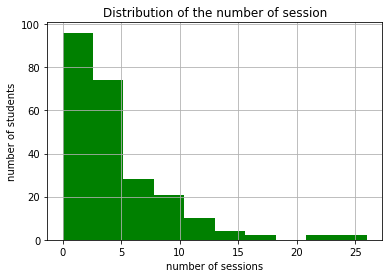

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(nb_session_id(dic).values(), color='g')
plt.ylabel('number of students')
plt.xlabel('number of sessions')
plt.title('Distribution of the number of session')
plt.grid()

In [38]:
raw_logs['testedExpression'].tail()

101919    intersection_intervalles_est_vide (7,24,32,43)
101920      intersection_intervalles_est_vide (4,6,3,14)
101921    intersection_intervalles_est_vide (32,43,7,24)
101922                                               NaN
101923                                               NaN
Name: testedExpression, dtype: object

In [39]:
raw_logs.columns

Index(['result', 'actor', 'verb', 'object', 'session.id', 'plugin',
       'commandRan', 'codeState', 'result.success', 'stdin', 'stdout',
       'stderr', 'filename', 'codestate', 'function', 'testedExpression',
       'testedline', 'testedFunction', 'expectedResult', 'obtainedResult',
       'timestamp'],
      dtype='object')

In [40]:
raw_logs[raw_logs['actor']=='b0797f36dd2e8a1'].groupby('verb')['timestamp'].count()

verb
File.Open          4
File.Save        136
Run.Command       87
Run.Program       96
Run.Test         254
Session.end        9
Session.start      9
Name: timestamp, dtype: int64

In [41]:
raw_logs[raw_logs['actor']=='b0797f36dd2e8a1']

,result,actor,verb,object,session.id,plugin,commandRan,codeState,result.success,stdin,...,stderr,filename,codestate,function,testedExpression,testedline,testedFunction,expectedResult,obtainedResult,timestamp
2385,NaN,b0797f36dd2e8a1,Session.start,Session,140335011513152,L1Test,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14 15:16:36.087000+00:00
2426,NaN,b0797f36dd2e8a1,Run.Command,Command,140335011513152,NaN,3+3\n,NaN,True,,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14 15:18:28.071000+00:00
2434,NaN,b0797f36dd2e8a1,Run.Command,Command,140335011513152,NaN,3**3\n,NaN,True,,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14 15:18:34.839000+00:00
2442,NaN,b0797f36dd2e8a1,Run.Command,Command,140335011513152,NaN,type(10+2)\n,NaN,True,,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14 15:18:58.870000+00:00
2479,NaN,b0797f36dd2e8a1,Run.Command,Command,140335011513152,NaN,10+2+7\n,NaN,True,,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-14 15:20:29.614000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98606,NaN,b0797f36dd2e8a1,Run.Test,Test,140548192502448,NaN,NaN,NaN,True,NaN,...,NaN,file_8425339164093313897,NaN,NaN,"signes_opposes(-5,6)",102.0,signes_opposes,True,True,2022-09-30 13:29:09.466000+00:00
98607,NaN,b0797f36dd2e8a1,Run.Test,Test,140548192502448,NaN,NaN,NaN,True,NaN,...,NaN,file_8425339164093313897,NaN,NaN,intervalle(9),112.0,intervalle,True,True,2022-09-30 13:29:09.473000+00:00
98608,NaN,b0797f36dd2e8a1,Run.Test,Test,140548192502448,NaN,NaN,NaN,True,NaN,...,NaN,file_8425339164093313897,NaN,NaN,intervalle(1),114.0,intervalle,False,False,2022-09-30 13:29:09.479000+00:00
101827,NaN,b0797f36dd2e8a1,File.Save,File,140548192502448,NaN,NaN,NaN,NaN,NaN,...,NaN,file_8425339164093313897,,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-30 14:24:57.631000+00:00


In [42]:
raw_logs['verb'].unique()

array(['Session.start', 'Session.end', 'Run.Program', 'File.Save',
       'Run.Command', 'File.Open', 'Docstring.Generate', 'Run.Test'],
      dtype=object)

In [43]:
df_test = raw_logs[(raw_logs['actor']=='b0797f36dd2e8a1')]

In [44]:
df_test= df_test[['actor','verb','timestamp']]

In [45]:
df_test['actor'].unique()

array(['b0797f36dd2e8a1'], dtype=object)

In [46]:
df_test['day'] = df_test['timestamp'].apply(lambda r:r.date)

In [47]:
# import numpy as np
# conditions = [
#     (df_test['verb'] == 'Session.start'),
#     (df_test['verb'] ==  'Session.end'),
#     (df_test['verb'] == 'Run.Program'),
#     (df_test['verb'] == 'File.Save'),
#     (df_test['verb'] == 'Run.Command'),
#     (df_test['verb'] == 'File.Open'),
#     (df_test['verb'] == 'Run.Test')
# ]
# values = [1, 2, 3, 4, 5, 6, 7]
# df_test['color'] = np.select(conditions, values)

In [48]:
df_test.head()

,actor,verb,timestamp,day
2385,b0797f36dd2e8a1,Session.start,2022-09-14 15:16:36.087000+00:00,2022-09-14
2426,b0797f36dd2e8a1,Run.Command,2022-09-14 15:18:28.071000+00:00,2022-09-14
2434,b0797f36dd2e8a1,Run.Command,2022-09-14 15:18:34.839000+00:00,2022-09-14
2442,b0797f36dd2e8a1,Run.Command,2022-09-14 15:18:58.870000+00:00,2022-09-14
2479,b0797f36dd2e8a1,Run.Command,2022-09-14 15:20:29.614000+00:00,2022-09-14


In [49]:
# df_val=pd.DataFrame()
# colors = {1:'red', 2:'green', 3:'blue', 4:'orange', 5:'yellow', 6:'black', 7:'purple'}
# colors_map ={'Session.start':'red', 'Session.end':'green','Run.Program':'blue','File.Save':'orange',
#              'Run.Command':'yellow','File.Open':'black','Run.Test':'purple'}
# for index, ele in enumerate(list(df_test['day'].unique())):
#     df_val=df_test[df_test['day']==ele]
#     plt.figure(figsize=(20,6))
#     plt.title(f'different actions done by the student {df_val["actor"].iat[0]} in day {df_val["day"].iat[0]}')
#     plt.scatter(x=df_val['timestamp'], y=df_val['actor'],c=[colors[i] for i in df_val['color']])
#     plt.grid()
#     handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors_map.items()]
#     plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()   

In [50]:
raw_logs['actor'].unique()[0]

'fbfac64def17f89'

In [51]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning) #ignore warnings 

def plot_visu(df):
    for val in list(raw_logs['actor'].unique()):   
        df = raw_logs[raw_logs['actor']== val]
        df[['actor','verb','timestamp']]
        df['day'] = df['timestamp'].apply(lambda r:r.date)
        conditions = [
            (df['verb'] == 'Session.start'),
            (df['verb'] ==  'Session.end'),
            (df['verb'] == 'Run.Program'), #executer le contenu de l'éditeur
            (df['verb'] == 'File.Save'),
            (df['verb'] == 'Run.Command'), #executer une commande python shell
            (df['verb'] == 'File.Open'),
            (df['verb'] == 'Run.Test'), #tester le code python
            (df['verb'] == 'Docstring.Generate')
        ]
        values = [1, 2, 3, 4, 5, 6, 7,8]
        df['color'] = np.select(conditions, values)
        df_val=pd.DataFrame()
        colors = {1:'red', 2:'green', 3:'blue', 4:'orange', 5:'yellow', 6:'black', 7:'purple',8: 'brown'}
        colors_legend ={'Session.start':'red', 'Session.end':'green','Run.Program':'blue','File.Save':'orange',
             'Run.Command':'yellow','File.Open':'black','Run.Test':'purple','Docstring.Generate':'brown'}
        for index, ele in enumerate(list(df['day'].unique())):
            df_val=df[df['day']==ele]
            plt.figure(figsize=(20,6))
            plt.title(f'different actions done by the student {df_val["actor"].iat[0]} in day {df_val["day"].iat[0]}')
            plt.scatter(x=df_val['timestamp'], y=df_val['actor'],c=[colors[i] for i in df_val['color']])
            plt.grid()
            handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors_legend.items()]
            plt.legend(title='legend', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

            plt.show()   

In [52]:
# df_viz = pd.DataFrame()
# plot_visu(df_viz)

In [53]:
data_hist = raw_logs[['actor','verb','session.id']]
data_hist = data_hist[data_hist['verb']=='Run.Test']

In [54]:
# Create a dictionary to map the old values to the new values
mapping = {val: idx+1 for idx, val in enumerate(data_hist['session.id'].unique())}

# Use the replace function to map the old values to the new values
data_hist['session.id'] = data_hist['session.id'].replace(mapping)


In [55]:
#the number of sessions where students has tested the code "run.test"
len(data_hist['session.id'].unique())

273

In [56]:
# # Create the bar chart
# # Sort the session.id column in increasing order
# data_hist = data_hist.sort_values('session.id')

# # Create the bar chart
# data_hist['session.id'].value_counts().plot(kind='bar')

# # Set the x-axis tick locations
# plt.xticks(range(0, data_hist['session.id'].max()+1,5))


# # Add labels and title to the chart
# plt.xlabel('Session ID')
# plt.ylabel('Frequency Count')
# plt.title('Frequency of Session ID')

# # Show the chart
# plt.show()


In [57]:
# # Create the bar chart
# data_ = data_hist['session.id'].value_counts().sort_index()

# # Create the bar chart
# data_.plot(kind='bar')

# # Set the x-axis tick locations to jump with 5 steps
# plt.xticks(range(0, data_.index.max()+1, 50))

# # Add labels and title to the chart
# plt.xlabel('Session ID')
# plt.ylabel('Frequency Count')
# plt.title('Frequency of Session ID')

# # Show the chart
# plt.show()


In [58]:
def plt_hist(df,bins=20):
    plt.hist(df['session.id'], bins= bins, ec= 'black')
    # Add labels and title to the chart
    plt.xlabel('Sessions')
    plt.ylabel('Frequency Count')
    plt.title('the number of the run.test per session ')
    plt.show()

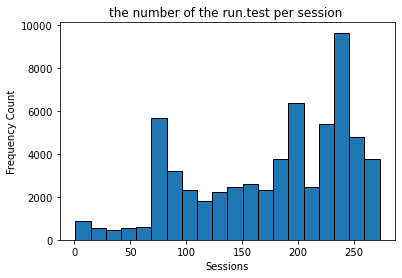

In [59]:
plt_hist(data_hist)

In [61]:
# data_session = raw_logs[['actor','verb','session.id']]
# for val in list(data_session['session.id'].unique()):
#     df = data_session[data_session['session.id']==val]
#     # Count the frequency of each unique verb
#     verb_counts = df["verb"].value_counts()
#     # Create a histogram of the verb counts
#     verb_counts.plot(kind="bar")
#     # Show the histogram
#     plt.show()


In [108]:
def data_session(df):
    data = df[['actor','verb','session.id']]
    # Group the dataframe by verb and session.id, and count the number of occurrences of each verb
    verb_counts = data.groupby(['verb','session.id']).size().reset_index(name='counts')
    # Create a histogram of the verb counts for all four session
    verb_counts.pivot(index='verb', columns='session.id', values='counts').plot(kind='bar', stacked=True,legend=None)
    # Show the histogram
    plt.show()
# there has been more "run.test" in all the sessions.id this means that the students test more ofen their code. (Maybe just when doing small changes... is it bad ?? )

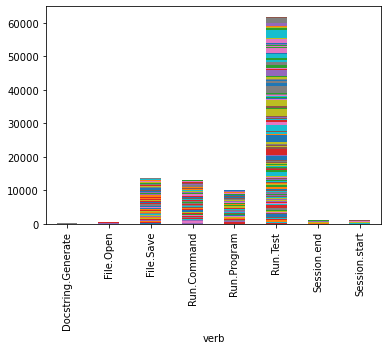

In [109]:
data_session(raw_logs)

In [106]:
raw_logs[raw_logs['result.success']=='False'].shape, raw_logs[raw_logs['result.success']=='True'].shape

((101924, 21), (0, 21))

In [ ]:
data_stack = raw_logs[['actor','verb','session.id']]
# Create a dictionary to map the old values to the new values
mapping = {val: idx+1 for idx, val in enumerate(data_stack['session.id'].unique())}

# Use the replace function to map the old values to the new values
data_stack['session.id'] = data_stack['session.id'].replace(mapping)

In [ ]:
data_stack.head()

,actor,verb,session.id
0,fbfac64def17f89,Session.start,1
1,fbfac64def17f89,Session.end,1
2,fbfac64def17f89,Session.start,2
3,fbfac64def17f89,Run.Program,2
4,fbfac64def17f89,Run.Program,2


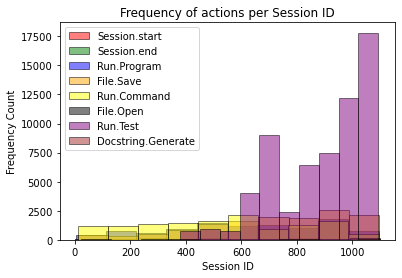

In [ ]:
#separate the data by 'verb' and 'session.id'
data_start = data_stack.loc[data_stack['verb']=='Session.start']
data_end = data_stack.loc[data_stack['verb']=='Session.end']
data_program = data_stack.loc[data_stack['verb']=='Run.Program']
data_save = data_stack.loc[data_stack['verb']=='File.Save']
data_command = data_stack.loc[data_stack['verb']=='Run.Command']
data_open = data_stack.loc[data_stack['verb']=='File.Open']
data_test = data_stack.loc[data_stack['verb']=='Run.Test']
data_generate = data_stack.loc[data_stack['verb']=='Docstring.Generate']

#Plot the data using plt.hist()
plt.hist(data_start['session.id'], bins=10, alpha=0.5, color='red',ec="black")
plt.hist(data_end['session.id'], bins=10, alpha=0.5, color='green',ec="black")
plt.hist(data_program['session.id'], bins=10, alpha=0.5, color='blue',ec="black")
plt.hist(data_save['session.id'], bins=10, alpha=0.5, color='orange',ec="black")
plt.hist(data_command['session.id'], bins=10, alpha=0.5, color='yellow',ec="black")
plt.hist(data_open['session.id'], bins=10, alpha=0.5, color='black',ec="black")
plt.hist(data_test['session.id'], bins=10, alpha=0.5, color='purple',ec="black")
plt.hist(data_generate['session.id'], bins=10, alpha=0.5, color='brown',ec="black")

# Add labels and title to the chart
plt.xlabel('Session ID')
plt.ylabel('Frequency Count')
plt.title('Frequency of actions per Session ID')
plt.legend(['Session.start', 'Session.end','Run.Program','File.Save','Run.Command','File.Open','Run.Test','Docstring.Generate'])

# Show the chart
plt.show()


In [ ]:
#total number of 'run.test in the dataframe of all the students'
data_hist[data_hist['verb']=="Run.Test"].shape 

(61839, 3)

How can we vizualize the time spent for students to change the code ?

chaque étudient peut avoir plusieurs session. a chaque fois l'étudient lance thonny génére une session 

count the number of actions (run.test,file.save...)<br>
nombre de session au cours du temps (y-axis : nombre d'action (run.test), x-axis : les sessions ordonnées)<br>
somme des run.test egal à 60000